In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [3]:
def seed_everything(seed: int=0):    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True


In [24]:
# dataset_dir = '../dataset/EchoNet-LVH/dataset'
dataset_dir = 'dataset'

In [25]:
data_list = glob.glob(os.path.join(dataset_dir, '*', '*.avi'))
label_df = pd.read_csv(os.path.join(dataset_dir, 'MeasurementsList.csv'), index_col=0)
data_list = [os.path.basename(data_path).split('.')[0] for data_path in data_list]
calc_list = ['LVPWd', 'LVIDd', 'IVSd']

In [26]:
data_df = label_df[label_df['HashedFileName'].apply(lambda x: x in data_list)]
data_df = data_df[data_df['Calc'].apply(lambda x: x in calc_list)]
data_df.reset_index(drop=True, inplace=True)
# 3개의 점이 반드시 존재하는 리스트
perfect_list = [filename for filename in data_df['HashedFileName'].unique() if len(data_df[data_df['HashedFileName'] == filename])==3]
data_df = data_df[data_df['HashedFileName'].apply(lambda x: x in perfect_list)]
data_df.reset_index(drop=True, inplace=True)


In [29]:
data_df.to_csv('dataset/MeasurementsList.csv')

## Data Selection

In [30]:
data_df

,HashedFileName,Calc,CalcValue,Frame,X1,X2,Y1,Y2,Frames,FPS,Width,Height,split
0,0X74FA16DE8ADD4FE6,LVPWd,0.906732,36,466,478,544,508,130,19.969,1024.0,768,train
1,0X74FA16DE8ADD4FE6,LVIDd,4.256507,36,478,540,508,341,130,19.969,1024.0,768,train
2,0X74FA16DE8ADD4FE6,IVSd,0.861528,36,540,552,341,307,130,19.969,1024.0,768,train
3,0X2EA926F54F8301D7,LVPWd,0.880773,58,412,432,594,560,211,19.971,1024.0,768,val
4,0X2EA926F54F8301D7,IVSd,0.892301,58,533,554,379,345,211,19.971,1024.0,768,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0X3AE13B776E62F444,LVPWd,1.220124,39,354,385,583,538,155,19.968,1024.0,768,train
710,0X3AE13B776E62F444,IVSd,1.353223,39,498,535,369,321,155,19.968,1024.0,768,train
711,0X4C9C1980FBCEE61D,LVIDd,4.774580,40,455,575,594,397,156,19.968,1024.0,768,train
712,0X4C9C1980FBCEE61D,LVPWd,0.695488,40,435,455,621,594,156,19.968,1024.0,768,train


In [31]:
a = data_df[data_df['HashedFileName'] == '0X74FA16DE8ADD4FE6']

In [32]:
a[a['Calc'] == 'LVPWd'][['X1', 'X2', 'Y1', 'Y2']].to_numpy().shape

(1, 4)

In [33]:
int(a[a['Calc'] == 'LVPWd']['Frames'])

130

In [34]:
from utils.dataset import EchoDataset

In [35]:
ds = EchoDataset(root=dataset_dir)

In [36]:
dl = DataLoader(ds, batch_size=1, shuffle=False)

In [42]:
s = dl.__iter__().__next__()

In [63]:
s[1][0].squeeze()

tensor([540, 552, 341, 307])

tensor([540, 552, 341, 307])
tensor([478, 540, 508, 341])
tensor([466, 478, 544, 508])


(-0.5, 1023.5, 767.5, -0.5)

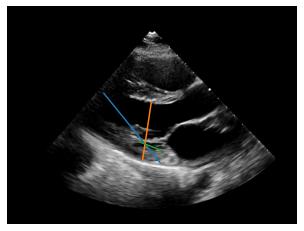

In [68]:
plt.imshow(s[0][0].squeeze().permute(1,2,0))
for coor in s[1]:
    coor = coor.squeeze()
    print(coor)
    plt.plot((coor[0], coor[2]),
            (coor[1], coor[3]))
plt.axis('off')